In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import ipywidgets as widgets
from IPython.display import display, Javascript

# NYC Taxi & Limousine Commission Dataset


##### New York is the city that never sleeps and it is often known as the busiest city in world. The taxis in New York are the lifeblood of the city. There are over 13,000 active yellow cabs in NYC and they do millions of trips in a month. We decided to analyze this data. The following analysis is about the yellow taxi trips in New York for one month.

##### Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

##### Data Dictionary: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

##### Github: https://github.com/pegasus-99/NYC_yellowcab_data_visualization


In [ ]:
parquet_file = 'https://github.com/pegasus-99/NYC_yellowcab_data_visualization/blob/main/yellow_tripdata.parquet?raw=true'

The data was in a parquet file, so we read it in a dataframe and converted it to a csv format

In [ ]:
df = pd.read_parquet(parquet_file, engine='auto')

In [ ]:
df.to_csv('yellow_tripdata.csv')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.4,1.0,N,114,148,1,3.5,3.0,0.5,1.80,0.00,0.3,9.10,2.5,0.0
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.4,1.0,N,79,137,1,6.5,3.0,0.5,2.05,0.00,0.3,12.35,2.5,0.0
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.2,1.0,N,79,74,1,16.0,3.0,0.5,3.95,0.00,0.3,23.75,2.5,0.0
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.4,1.0,N,138,113,1,28.0,3.0,0.5,7.65,6.55,0.3,46.00,2.5,0.0
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.7,1.0,N,137,68,1,11.0,3.0,0.5,1.00,0.00,0.3,15.80,2.5,0.0


In [ ]:
# Converting pickup and dropoff columns from object to datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# To check the missing values 

df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          93174
trip_distance                0
RatecodeID               93174
store_and_fwd_flag       93174
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     93174
airport_fee              93174
dtype: int64

Out of 3.1 million rows, only around 93,000 of them seem to have null 
values. Which is not a very significant amount

In [ ]:
# Dropping data where fare amount is less than 0 and trip distance is 0

drops = df[(df["fare_amount"] <= 0) | (df["trip_distance"] == 0) ]
df = df[ ~df.index.isin(drops.index) ].copy()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.40,1.0,N,114,148,1,3.50,3.0,0.5,1.80,0.00,0.3,9.10,2.5,0.0
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.40,1.0,N,79,137,1,6.50,3.0,0.5,2.05,0.00,0.3,12.35,2.5,0.0
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.20,1.0,N,79,74,1,16.00,3.0,0.5,3.95,0.00,0.3,23.75,2.5,0.0
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.40,1.0,N,138,113,1,28.00,3.0,0.5,7.65,6.55,0.3,46.00,2.5,0.0
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.70,1.0,N,137,68,1,11.00,3.0,0.5,1.00,0.00,0.3,15.80,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152671,1,2022-08-31 23:46:16,2022-08-31 23:50:42,NaN,0.90,NaN,None,234,48,0,5.50,0.5,0.5,1.40,0.00,0.3,10.70,NaN,NaN
3152672,2,2022-08-31 23:40:00,2022-08-31 23:49:00,NaN,1.52,NaN,None,234,158,0,10.30,0.0,0.5,0.00,0.00,0.3,13.60,NaN,NaN
3152673,1,2022-08-31 23:11:41,2022-08-31 23:21:23,NaN,2.10,NaN,None,48,238,0,8.00,0.5,0.5,1.77,0.00,0.3,13.57,NaN,NaN
3152674,2,2022-08-31 23:02:53,2022-08-31 23:12:13,NaN,1.00,NaN,None,230,48,0,10.25,0.0,0.5,3.18,0.00,0.3,16.73,NaN,NaN


In [ ]:
# Creating columns for pickup date and pickup time from the datetime format, same for dropoff 

df['pickup_date'] =  [d.date() for d in df['tpep_pickup_datetime']]
df['pickup_time'] =  [d.time() for d in df['tpep_pickup_datetime']]
df['dropoff_date'] = [d.date() for d in df['tpep_dropoff_datetime']]
df['dropoff_time'] = [d.time() for d in df['tpep_dropoff_datetime']]

In [ ]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
pickup_date                      object
pickup_time                      object
dropoff_date                     object
dropoff_time                     object
dtype: object

In [ ]:
# Converting pickup date and dropoff date into datetime format

df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])

In [ ]:
# Checking statistial values of various columns

pd.set_option('display.float_format', lambda x: '%.4f' % x)
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3083460.0000,2996849.0000,3083460.0000,2996849.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,3083460.0000,2996849.0000,2996849.0000
mean,1.7257,1.4245,5.8242,1.3953,163.4856,160.8654,1.1932,14.8167,1.0073,0.4964,2.6771,0.5653,0.3000,21.6342,2.3059,0.1101
std,0.4732,0.9838,571.4095,5.6470,64.6933,70.0256,0.4727,13.8209,1.2374,0.0425,3.1656,2.0524,0.0032,17.2881,0.6689,0.3542
min,1.0000,0.0000,0.0100,1.0000,1.0000,1.0000,0.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000,0.3100,0.0000,0.0000
25%,1.0000,1.0000,1.1800,1.0000,132.0000,112.0000,1.0000,7.0000,0.0000,0.5000,0.0000,0.0000,0.3000,12.3000,2.5000,0.0000
50%,2.0000,1.0000,1.9800,1.0000,161.0000,162.0000,1.0000,10.0000,0.5000,0.5000,2.1500,0.0000,0.3000,15.9500,2.5000,0.0000
75%,2.0000,2.0000,3.7700,1.0000,233.0000,233.0000,1.0000,16.0000,2.5000,0.5000,3.2700,0.0000,0.3000,22.8000,2.5000,0.0000
max,6.0000,9.0000,330578.6600,99.0000,265.0000,265.0000,4.0000,1136.5000,9.0500,3.3000,335.0000,139.4500,0.3000,1139.8000,2.7500,1.2500


In [ ]:
# Converting columns to datetime

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# Creating columns for day, weekday, hour and month for pickup and dropoff

df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()
df['pickup_weekday']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['tpep_dropoff_datetime'].dt.weekday
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour
df['pickup_month']=df['tpep_pickup_datetime'].dt.month
df['dropoff_month']=df['tpep_dropoff_datetime'].dt.month

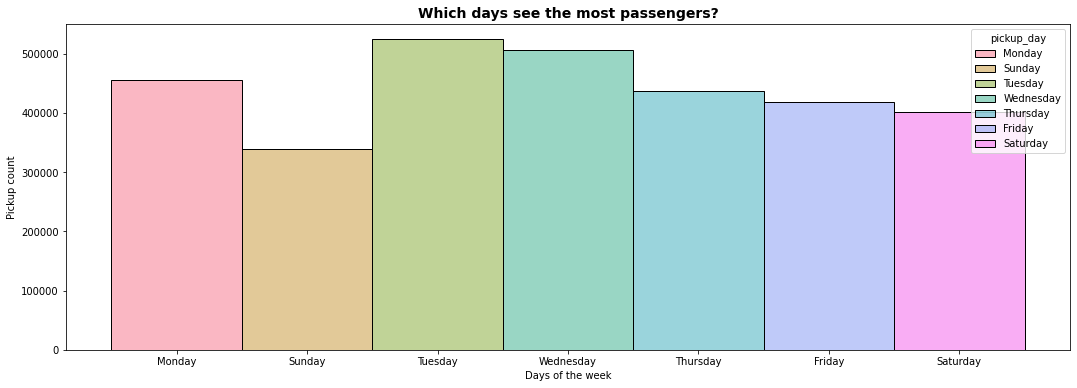

In [ ]:
# Trip count vs Days of week

plt.figure(figsize=(18,6))
sns.histplot(data=df, x='pickup_day', hue='pickup_day', palette="husl")
plt.title("Which days see the most passengers?", fontweight="bold", fontsize=14)
plt.xlabel('Days of the week')
plt.ylabel('Pickup count')
plt.show()


From the above visualization, we can conclude that Tuesdays and Wednesdays are the busiest days of the week. Taxis are used the least on Sundays.

As a Taxi Driver, I will know that I am more likely to get more customers on Tuesdays and Wednesdays.

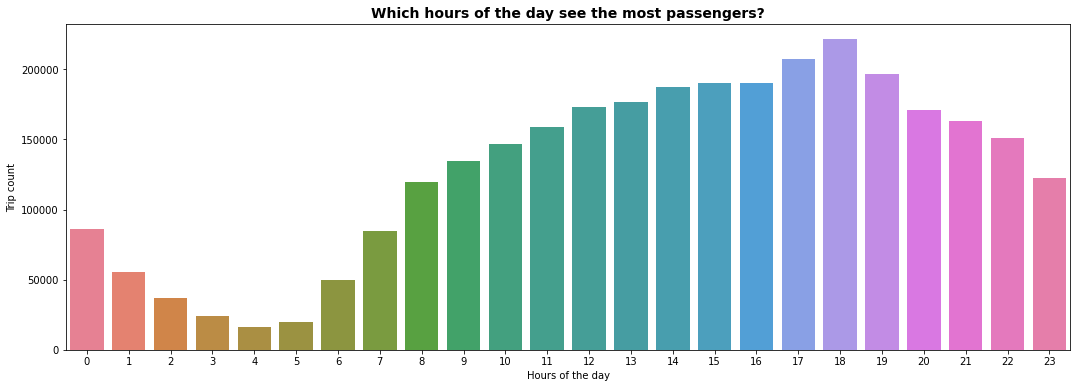

In [ ]:
# Trip count vs Hours of the day

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='pickup_hour', palette="husl")
plt.title("Which hours of the day see the most passengers?", fontweight="bold", fontsize=14)
plt.xlabel('Hours of the day')
plt.ylabel('Trip count')
plt.show()

In [ ]:
data = df.copy()
data['pickup_date'] = data['pickup_date'].dt.date

In [ ]:
data_group = data.groupby('pickup_date').count()

In [ ]:
data_group = data_group.reset_index()

In [ ]:
# Trip count vs Hours of the day according to a particular Date

dates = list(data['pickup_date'].unique())
@widgets.interact(Date = dates)
def f(Date):      
    datax = data[(data['pickup_date']==Date)]
    plt.figure(figsize=(18,6))
    sns.countplot(data=datax, x='pickup_hour', palette="husl")
    plt.title("Which hours of the day see the most customers according to a particular date", fontweight="bold", fontsize=14)
    plt.xlabel('Hours of the day')
    plt.ylabel('Pickup count')
    plt.show()
    

interactive(children=(Dropdown(description='Date', options=(datetime.date(2022, 8, 1), datetime.date(2022, 7, …

#### Vedors according to the Data dictionary

1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

In [ ]:
# What are the different Vendors available?

df.VendorID.unique()

array([1, 2, 6, 5])

In [ ]:
#Removing 5, 6 - they don't mean anything according to data dictionary
df.drop(df[df['VendorID'] == 6].index, inplace = True)
df.drop(df[df['VendorID'] == 5].index, inplace = True)

print(df.VendorID.unique())

[1 2]


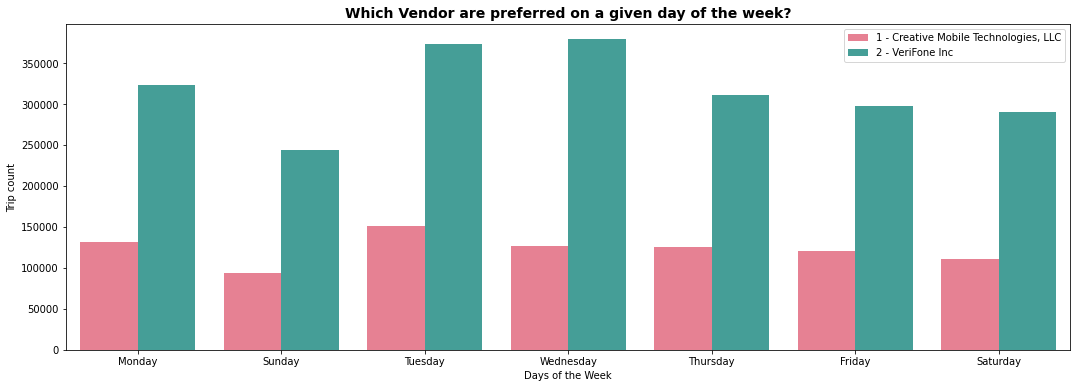

In [ ]:
# Vendors vs Days

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='pickup_day', hue='VendorID', palette="husl")
plt.title("Which Vendor are preferred on a given day of the week?", fontweight="bold", fontsize=14)
plt.xlabel('Days of the Week')
plt.ylabel('Trip count')
plt.legend(["1 - Creative Mobile Technologies, LLC", "2 - VeriFone Inc"])
plt.show()

On most days, Vendor 2 followed by Vendor 1 is preferred by passengers.

In [ ]:
# Vendors acc to a particular Date

data.drop(data[data['VendorID'] == 6].index, inplace = True)
data.drop(data[data['VendorID'] == 5].index, inplace = True)

dates = list(data['pickup_date'].unique())
@widgets.interact(Date = dates)
def f(Date):      
    datax = data[(data['pickup_date']==Date)]
    plt.figure(figsize=(18,6))
    sns.countplot(data=datax, x='VendorID', palette="husl")
    plt.title("Prefered Vendor according to a particular date", fontweight="bold", fontsize=14)
    plt.xlabel('Different Vendors')
    plt.ylabel('Pickup count')
    plt.show()
    

interactive(children=(Dropdown(description='Date', options=(datetime.date(2022, 8, 1), datetime.date(2022, 7, …

#### Payment Methods according to the Data dictionary.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

In [ ]:
# What are the different payment methods available?

df.payment_type.unique()

array([1, 2, 3, 4, 0])

In [ ]:
#Removing 0 as it does not mean anything according to data dictionary
df.drop(df[df['payment_type'] == 0].index, inplace = True)

print(df.payment_type.unique())

[1 2 3 4]


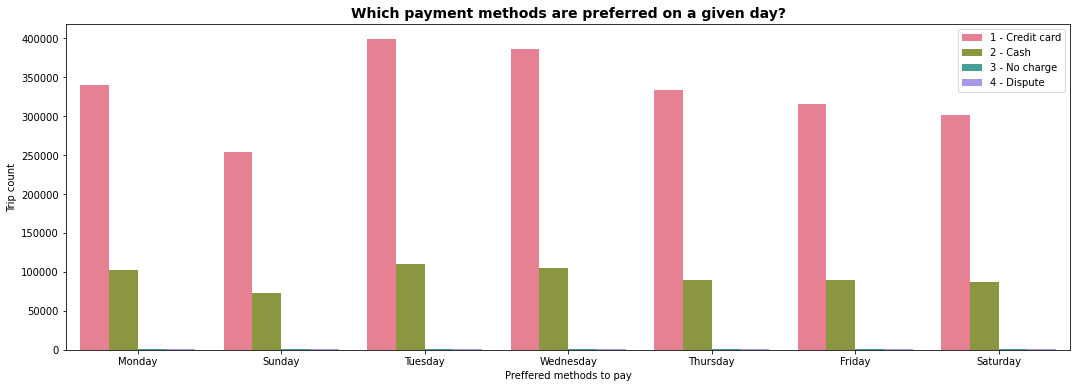

In [ ]:
# Payment method vs Days

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='pickup_day', hue='payment_type', palette='husl')
plt.title("Which payment methods are preferred on a given day?", fontweight="bold", fontsize=14)
plt.xlabel('Preffered methods to pay')
plt.ylabel('Trip count')
plt.legend(title='Payment Method')
plt.legend(['1 - Credit card','2 - Cash','3 - No charge','4 - Dispute'])

plt.show()

On most days, payment method 1 is preferred, followed by method 2.

In [ ]:
# Number of Passengers

df.passenger_count.unique()

array([1., 0., 2., 5., 3., 4., 6., 8., 7., 9.])

In [ ]:
# Converting float to int

df['passenger_count'] = df['passenger_count'].fillna(0).astype(int)
df.passenger_count.unique()

array([1, 0, 2, 5, 3, 4, 6, 8, 7, 9])

In [ ]:
# Removing the outliers that make no sense

df.drop(df[df['passenger_count'] == 0].index, inplace = True)
df.drop(df[df['passenger_count'] == 7].index, inplace = True)
df.drop(df[df['passenger_count'] == 8].index, inplace = True)
df.drop(df[df['passenger_count'] == 9].index, inplace = True)
df.passenger_count.unique()

array([1, 2, 5, 3, 4, 6])

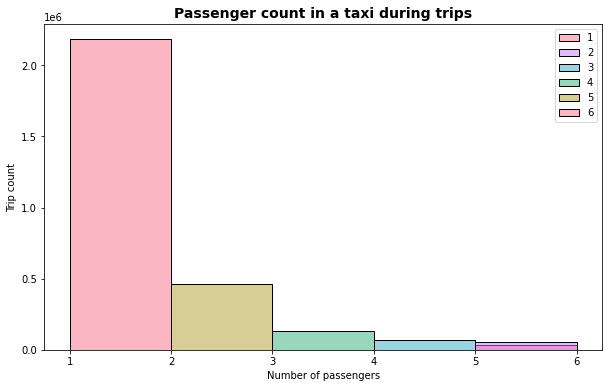

In [ ]:
# Passenger count

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='passenger_count', hue='passenger_count', palette='husl', bins = 5)
plt.legend(['1','2','3','4','5','6'])
plt.title("Passenger count in a taxi during trips", fontweight="bold", fontsize=14)
plt.xlabel('Number of passengers')
plt.ylabel('Trip count')

plt.show()

Most taxis have 1 passenger. And taxis have 4-6 passengers on rare occasions.

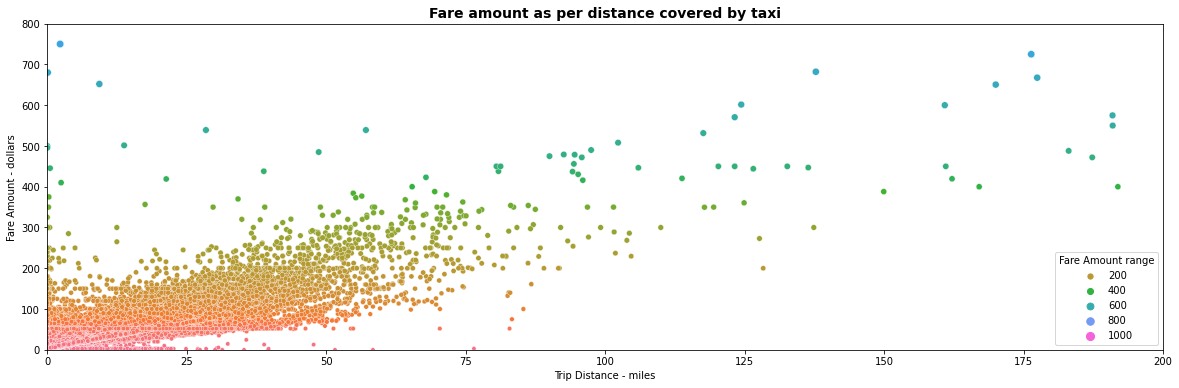

In [ ]:
# Fare amount vs Trip Distance

plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='fare_amount', size = 'fare_amount', palette='husl')

plt.xlim(0, 200)
plt.ylim(0, 800)
plt.title('Fare amount as per distance covered by taxi', fontweight="bold", fontsize=14)
plt.xlabel('Trip Distance - miles')
plt.ylabel('Fare Amount - dollars')
plt.legend(title='Fare Amount range')

plt.show()

As expected, as the trip distance increases so does the fare amount of the trips.

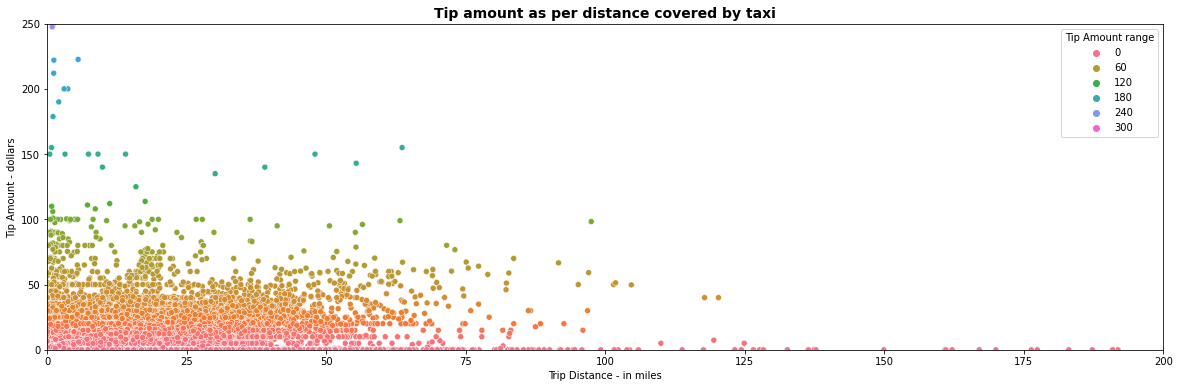

In [ ]:
# Tip amount vs Trip Distance

plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', hue='tip_amount', palette='husl')

plt.xlim(0, 200)
plt.ylim(0, 250)
plt.title('Tip amount as per distance covered by taxi', fontweight="bold", fontsize=14)
plt.xlabel('Trip Distance - in miles')
plt.ylabel('Tip Amount - dollars')
plt.legend(title='Tip Amount range')


plt.show()

While we usually see that there is a relation between the tip and the fare in other services. That is not the case when it comes to Taxi service. People stick to a bare minimum tip regardless of the distance covered by taxis.

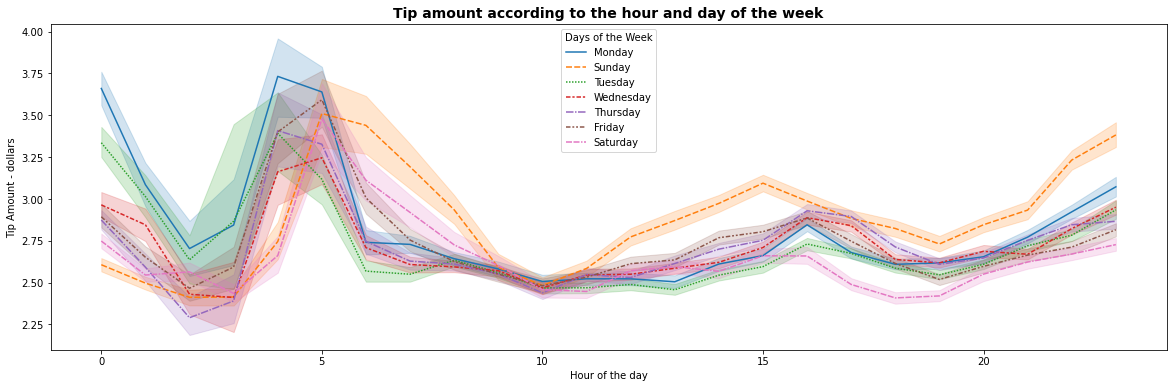

In [ ]:
# Tip acc time and day

plt.figure(figsize=(20,6))
sns.lineplot(data=data, x="pickup_hour", y="tip_amount", hue="pickup_day", style="pickup_day")


plt.title("Tip amount according to the hour and day of the week",fontweight="bold", fontsize=14)
plt.xlabel('Hour of the day')
plt.ylabel('Tip Amount - dollars')
plt.legend(title = "Days of the Week")

plt.show()

From this visualization, we can conclude that higher tips are given after midnight especially at 12-1 am and 4-6am.

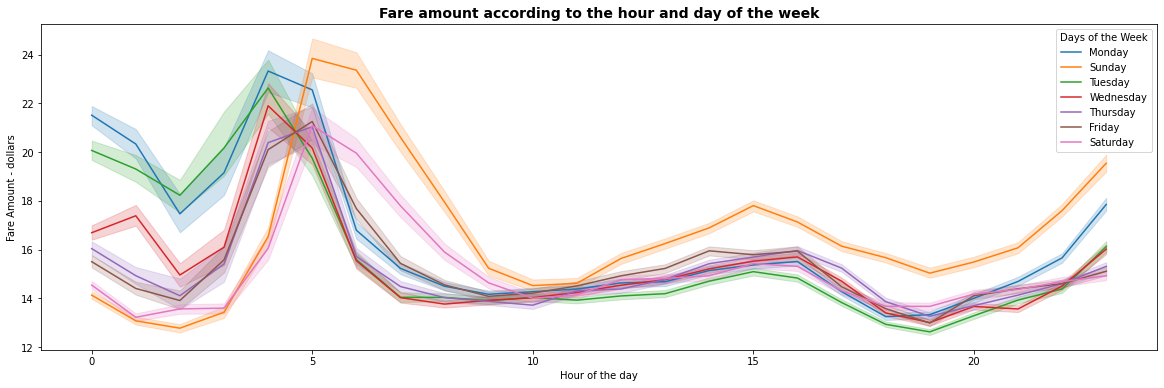

In [ ]:
# Fare acc time and day

plt.figure(figsize=(20,6))
sns.lineplot(data=data, x="pickup_hour", y="fare_amount", hue="pickup_day")
#plt.ylim([1,3,5,7,9,11,13,15,17,19,21,23])

plt.title("Fare amount according to the hour and day of the week", fontweight="bold", fontsize=14)
plt.xlabel('Hour of the day')
plt.ylabel('Fare Amount - dollars')
plt.legend(title = "Days of the Week")
plt.show()


From this visualization, we dedude that fares are higher after midnight. I'm guessing that taxis have a higher rate for night time.

### NB1
Basic Questions about the dataset

### NB2
Further analysis - Taxi Zone, Other Fares, Tip Percent



# continue to NB2